In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_excel('Outlook.xlsx')

In [3]:
data['Date'] = pd.to_datetime(data['Date'])


In [4]:
data.set_index('Date', inplace=True)



<Axes: xlabel='Date'>

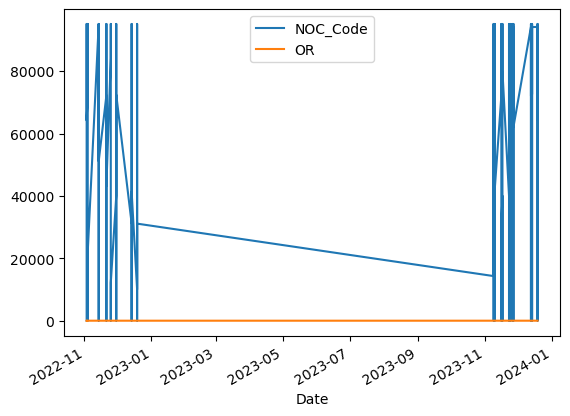

In [5]:
data.plot()


In [6]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['OR'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -22.923625
p-value: 0.000000


In [7]:
data_diff = data['OR'].diff().dropna()


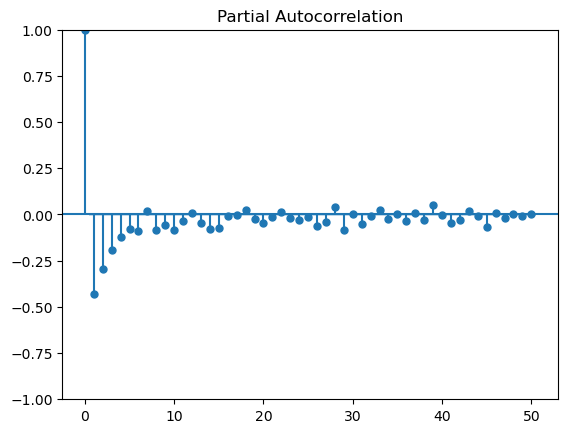

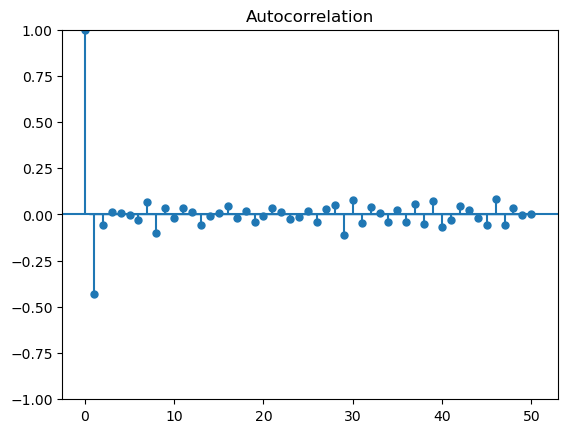

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assuming `data_diff` is your differenced series
plot_pacf(data_diff)  # To help determine `p`
plt.show()

plot_acf(data_diff)   # To help determine `q`
plt.show()


In [9]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_diff, order=(1,1,1))
model_fit = model.fit()


C:\Users\mukes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mukes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mukes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mukes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mukes\anaconda3\Lib\site-

In [10]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                     OR   No. Observations:                87719
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -156441.835
Date:                Thu, 11 Apr 2024   AIC                         312889.671
Time:                        00:05:24   BIC                         312917.816
Sample:                             0   HQIC                        312898.263
                              - 87719                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4281      0.002   -180.516      0.000      -0.433      -0.423
ma.L1         -1.0000      0.007   -135.199      0.000      -1.014      -0.985
sigma2         2.0728      0.019    109.691      0.0

In [11]:
forecast_horizon = 3  # Forecasting 3 periods into the future
forecast = model_fit.forecast(steps=forecast_horizon)

C:\Users\mukes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
print(forecast)

87719   -0.000030
87720   -0.000017
87721   -0.000022
Name: predicted_mean, dtype: float64


In [14]:
output_directory = r'C:\Users\mukes\Desktop\Outlook files'
data.to_csv(output_directory + r'\predicted.csv', index=False, encoding='utf-8')

In [16]:
df = pd.read_csv('predicted.csv')

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

KeyError: 'Date'